In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os 
import cv2
cwd = os.getcwd() + '/Self-Driving/'
# Read in the image
image = mpimg.imread(cwd+'edge2.jpg')

In [4]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [19]:
mask = np.zeros_like(edges)
ignore_mask_color = 255
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)


In [20]:
cv2.fillPoly(mask,vertices,ignore_mask_color)
masked_edges = cv2.bitwise_and(edges,mask)

In [25]:
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0

In [26]:
color_edges = np.dstack((edges, edges, edges))

In [27]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

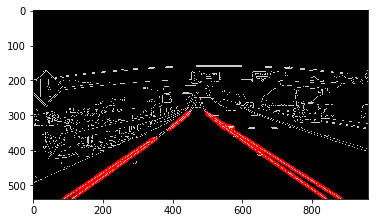

In [28]:
lines_edges = cv2.addWeighted(color_edges,0.8,line_image,1,0)
plt.imshow(lines_edges)
plt.show()

In [30]:
import imageio
imageio.plugins.ffmpeg.download()
from moviepy.editor import VideoFileClip
from IPython.display import HTML